# Matemática para Ciencia de los Datos
# Trabajo Práctico 4

Profesor: Juan Luis Crespo Mariño (basado en trabajo previo del Prof. Dr. Luis Alexánder Calvo Valverde)

Instituto Tecnológico de Costa Rica,

Programa Ciencia de Datos

---

Fecha de entrega: 5 de Noviembre del 2024, a más tardar a las 6:00 pm.

Medio de entrega: Por medio del TEC-Digital.

Entregables: Un archivo jupyter ( .IPYNB ).

Estudiante(s):
1. Jonathan Chavarria Miranda
1. Felipe Quesada Miranda



---

## Parte 1

Dada la siguiente matriz:

\begin{equation}
A= \begin{bmatrix}
   1.,2. \\
   3.,4.
\end{bmatrix}
\end{equation}




**Ejercicio 1.1 (25 puntos)**

En una celda de texto, calcule los auto-valores y deje planteada la ecuación para el cálculo de los los auto-vectores como los ejemplos vistos en clase. Debe mostrar todo el procedimiento.

Para una matriz cuadrada A, los autoxalores $\lambda$ son las soluciones de la ecuación característica:
$\det(A - \lambda I) = 0 \\$ 

$A - \lambda I = \begin{bmatrix} 1 - \lambda & 2 \\ 3 & 4 - \lambda \end{bmatrix} \\$

$\det(A - \lambda I) = \det\begin{bmatrix} 1 - \lambda & 2 \\ 3 & 4 - \lambda \end{bmatrix} \\$

$\text{Dada la ecuacion:} \quad (1 - \lambda)(4 - \lambda) - 6 = 0 \\$

$\text{Expandiendo el producto } (1 - \lambda)(4 - \lambda): \\$

$ = 1(4 - \lambda) - \lambda(4 - \lambda) = 4 - \lambda - 4\lambda + \lambda^2 = \lambda^2 - 5\lambda + 4 \\$

$\text{Sustituyendo en la ecuacion original:} \\$

$\lambda^2 - 5\lambda + 4 - 6 = 0 \\$

$\text{Simplificando: } \\$

$\lambda^2 - 5\lambda - 2 = 0 \\$

$\text{Resolxiendo para la ecuacion} \\$

$\lambda^2 - 5\lambda - 2 = 0 \text{ usando la ecuacion cuadratica} \\$

$\lambda = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a} \\$

$\text{donde } a = 1, b = -5, c = -2. \\$

$\text{Sustituyendo esos xalores} \\$

$\lambda = \frac{-(-5) \pm \sqrt{(-5)^2 - 4(1)(-2)}}{2(1)} = \frac{5 \pm \sqrt{25 + 8}}{2} = \frac{5 \pm \sqrt{33}}{2} \\$

$\text{Por lo tanto los autoxalores son:} \\$

$\lambda_{1} = \frac{5 + \sqrt{33}}{2} \quad \text{o} \quad \lambda_{2} = \frac{5 - \sqrt{33}}{2} \\$

$\text{Para el calculo de los autoxectores se debe satisfacer la ecuacion:} \\$

$( A - \lambda I) x = 0 \\$

$\text{Para } \lambda_{1} : \frac{5 + \sqrt{33}}{2}\\$

$(A - \lambda_{1} I)x = \begin{bmatrix} 1 - \lambda_{1} & 2 \\ 3 & 4 - \lambda_{1} \end{bmatrix} \begin{bmatrix} x_{1} \\ x_{2} \end{bmatrix} = 0\\$

$\text{sustituyendo en la Matriz : } \\$

$\begin{bmatrix} 1 - \frac{5 + \sqrt{33}}{2} & 2 \\ 3 & 4 - \frac{5 + \sqrt{33}}{2} \end{bmatrix}\begin{bmatrix} x_{1} \\ x_{2} \end{bmatrix} = 0 \\$

$\begin{bmatrix} \frac{-3 - \sqrt{33}}{2} & 2 \\ 3 &  \frac{3 - \sqrt{33}}{2} \end{bmatrix}\begin{bmatrix} x_{1} \\ x_{2} \end{bmatrix} = 0 \\$

$\text{Para } \lambda_{2} : \quad \lambda_{2} = \frac{5 - \sqrt{33}}{2}\\$

$(A - \lambda_{2} I)x = \begin{bmatrix} 1 - \lambda_{2} & 2 \\ 3 & 4 - \lambda_{2} \end{bmatrix} \begin{bmatrix} x_{1} \\ x_{2} \end{bmatrix} = 0\\$

$\text{sustituyendo en la Matriz : } \\$

$\begin{bmatrix} 1 - \frac{5 - \sqrt{33}}{2} & 2 \\ 3 & 4 - \frac{5 - \sqrt{33}}{2} \end{bmatrix}\begin{bmatrix} x_{1} \\ x_{2} \end{bmatrix} = 0 \\$

$\begin{bmatrix} \frac{-3 + \sqrt{33}}{2} & 2 \\ 3 &  \frac{3 + \sqrt{33}}{2} \end{bmatrix}\begin{bmatrix} x_{1} \\ x_{2} \end{bmatrix} = 0 \\$



**Ejercicio 1.2 (25 puntos)**

En una celda de código y utilizando la función eig de numpy, calcule los auto-valores y auto-vectores y haga las operaciones en el código para mostrar que se cumple: $A\,\vec{x} = \lambda\vec{x}$ (No olvide las pequeñas posibles diferencias por precisión de la representación numérica).


In [96]:
import numpy as np
A = np.array([[1. , 2.] , [3. , 4.]])
eigenvalues, eigenvectors = np.linalg.eig(A)

eigenvectors = np.transpose(eigenvectors) # Se debe trasnponer ya que son dos vectores columna

print( "Los eigenvalues son: \n" , "λ1 = " ,  eigenvalues[0] , " y " , "λ2 = " , eigenvalues[1] , "\n")
print( "Los eigenvectors son: \n Para λ1 : x1 = "  , eigenvectors[0] , " y para λ2 : x2 = " , eigenvectors[1])

#(A - λ1I)x1 = 0 
print ("\n (A - λI)x = 0 \n" , np.matmul(A - eigenvalues[0]*np.identity(2) , eigenvectors[0]))

#(A - λ2I)x2 = 0 
print ("\n (A - λI)x = 0 \n" , np.matmul(A - eigenvalues[1]*np.identity(2) , eigenvectors[1]))


Los eigenvalues son: 
 λ1 =  -0.3722813232690143  y  λ2 =  5.372281323269014 

Los eigenvectors son: 
 Para λ1 : x1 =  [-0.82456484  0.56576746]  y para λ2 : x2 =  [-0.41597356 -0.90937671]

 (A - λI)x = 0 
 [0. 0.]

 (A - λI)x = 0 
 [0. 0.]



---

## Parte 2


Realice lo siguiente: **(40 puntos)**
1. Similar a los ejemplos vistos, aplíquele la estrategia PCA a los datos en el archivo adjunto "data_banknote_authentication.csv" (el $Y$ corresponde a la columna llamada clase).
1. En este caso use los tres primeros componentes principales (no dos como en el ejemplo).
1. El ejercicio termina graficando la varianza acumulada versus los componentes principales.

---



------------------------------------------------------
Filas data_banknote 1372
Columnas data_banknote 5
------------------------------------------------------
[[  3.6216    8.6661   -2.8073   -0.44699]
 [  4.5459    8.1674   -2.4586   -1.4621 ]
 [  3.866    -2.6383    1.9242    0.10645]
 ...
 [ -3.7503  -13.4586   17.5932   -2.7771 ]
 [ -3.5637   -8.3827   12.393    -1.2823 ]
 [ -2.5419   -0.65804   2.6842    1.1952 ]]
Filas X 1372
Columnas X 4
[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]
Filas Y 1372
Columnas Y 1
idx:  [2 3 1 0]


idx[::-1]:  [0 1 3 2]
Auto-valores:
[2.80624544 0.52306238 0.24702755 0.10967099]
Auto-vectores:
[[ 0.14102363  0.80185963  0.43129585  0.38873816]
 [ 0.81039291 -0.263574    0.45613683 -0.25638111]
 [-0.54974221 -0.30038199  0.77819474 -0.04435204]
 [-0.14546192  0.44420777  0.01833097 -0.88384629]]
eigenvalues_normalized:
[0.76132409 0.1419049  0.02975334 0.06701767]
Varianza explicada:
[0.76132409 0.903229   0.93298233 1.        ]
             0         1        

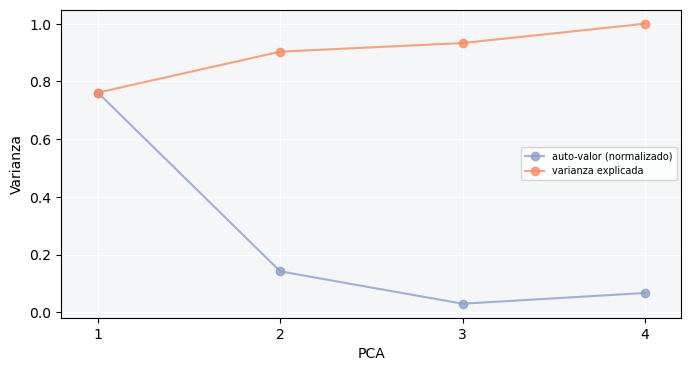

In [98]:
%matplotlib inline

import pandas as pd
import numpy as np
#import sklearn.datasets
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [8, 4]


archivo = "data_banknote_authentication.csv"
data_banknote = pd.read_csv(archivo, header = 0 , delimiter = ';')
datos = pd.DataFrame(data_banknote).to_numpy()



dimensiones = data_banknote.shape
filas, columnas = dimensiones



print("------------------------------------------------------")
print("Filas data_banknote", filas)
print("Columnas data_banknote", columnas)
print("------------------------------------------------------")

#print(data_banknote)
X=datos[0:datos.shape[0]  , 0:4]
print(X)

dimensiones_X = X.shape
filas_X, columnas_X = dimensiones_X
print("Filas X", filas_X)
print("Columnas X", columnas_X)

# Escalar los datos en X
X_zscaled = (X - X.mean()) / X.std(ddof=1)

#print( X_zscaled )
Y_dataFrame = data_banknote.loc[:, "class"]
Y=pd.DataFrame(Y_dataFrame).to_numpy()
print(Y)

dimensiones_Y = Y.shape
filas_Y, columnas_Y = dimensiones_Y
print("Filas Y", filas_Y)
print("Columnas Y", columnas_Y)


eigenvalues, eigenvectors = np.linalg.eig( np.cov(X_zscaled,rowvar=False))
# los normaliza
eigenvalues_normalized = eigenvalues / eigenvalues.sum()
# calcula la varianza explicada
cumvar_explained = np.cumsum(eigenvalues_normalized)

############################################################
# Ordenar de mayor a menor, 
# debido a que np.linalg.eig no asegura que vengan ordenados
idx = np.argsort(eigenvalues) 
print( "idx: ", idx )
idx = idx[::-1]     
print("\n\nidx[::-1]: ", idx  )

# Ordenar tanto los autovalroes como los autovectores
eigenvectors = eigenvectors[:,idx]
eigenvalues = eigenvalues[idx] 


print("Auto-valores:")
print(eigenvalues)
print("Auto-vectores:")
print( eigenvectors)
print("eigenvalues_normalized:")
print(eigenvalues_normalized)
print("Varianza explicada:")
print( cumvar_explained )


# Proyecta los datos y los grafica
T = pd.DataFrame(X_zscaled.dot(eigenvectors))
print(T)
# Nombres de columnas
T.columns = ['pc1', 'pc2', 'pc3', 'pc4']

# agrega la etiqueta de las especies
T = pd.concat([T, Y_dataFrame], axis=1)

print("Parte de las muestras proyectadas")
print(T.head(5))





#########################################
# Primer gráfico
#########################################
# Separa por la etiqueta 
class_ = [T[T==0], 
          T[T==1], 
          ]

# define un color por especie
colors = ['#1b9e77', '#d95f02']

_, (ax1) = plt.subplots(1, sharey=False)

# muestra el componente principal respecto al total de varianza en los datos
ax1.plot([1,2,3,4],
         eigenvalues_normalized,
         '-o',
         color='#8da0cb',
         label='auto-valor (normalizado)',
         alpha=0.8,
         zorder=1000)

ax1.plot([1,2,3,4],
         cumvar_explained,
         '-o',
         color='#fc8d62',
         label='varianza explicada',
         alpha=0.8,
         zorder=1000)

ax1.set_xlim(0.8, 4.2)
ax1.set_xticks([1,2,3,4])
ax1.set_xlabel('PCA')
ax1.set_ylabel('Varianza')
ax1.legend(loc='center right', fontsize=7)
ax1.grid(color='#fdfefe')
ax1.set_facecolor('#f4f6f7')



___

## Parte 3

Como en el segundo gráfico del cuaderno visto en clase sobre PCA, grafique los tres mayores componentes principales utilizando la bibioteca **plotly** https://plotly.com/python/3d-scatter-plots/  **(10 puntos)**


___

In [99]:
import plotly.express as px
df=T
fig = px.scatter_3d(df, x='pc1', y='pc2', z='pc3',
              color='class')
fig.show()